In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [9]:
# -----------------------------------------------------------
# Генерація штучного класифікаційного набору даних
# -----------------------------------------------------------

features, target = make_classification(
    n_samples=300,        # аналогічно 100 у твоїй регресії, але збільшуємо для кращої моделі
    n_features=2,         # щоб можна було візуалізувати
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=10
)

# Формування DataFrame
synthetic_df = pd.DataFrame({
    'Feature1': features[:, 0],
    'Feature2': features[:, 1],
    'Target': target
})

print(synthetic_df.head())


   Feature1  Feature2  Target
0 -1.239462 -0.872695       0
1  1.488867  3.069429       0
2 -0.189858  1.197062       1
3  1.888744 -1.030619       1
4  0.534932 -0.895933       1


In [10]:
# -----------------------------------------------------------
# Розділення на тренувальні і тестові дані
# -----------------------------------------------------------

F_train, F_test, T_train, T_test = train_test_split(
    synthetic_df[['Feature1', 'Feature2']], 
    synthetic_df['Target'], 
    test_size=0.2, 
    random_state=10,
    stratify=synthetic_df['Target']
)

In [11]:
# -----------------------------------------------------------
# Масштабування ознак
# -----------------------------------------------------------

scaler = StandardScaler()
F_train_scaled = scaler.fit_transform(F_train)
F_test_scaled = scaler.transform(F_test)

In [12]:
# -----------------------------------------------------------
# Створення та навчання моделі
# -----------------------------------------------------------

synthetic_model = LogisticRegression()
synthetic_model.fit(F_train_scaled, T_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
# -----------------------------------------------------------
# Передбачення
# -----------------------------------------------------------

T_pred = synthetic_model.predict(F_test_scaled)

In [14]:
# -----------------------------------------------------------
# Оцінка моделі
# -----------------------------------------------------------

acc = accuracy_score(T_test, T_pred)
print(f"Accuracy: {acc:.3f}")

print("\nКласифікаційний звіт:\n")
print(classification_report(T_test, T_pred))

Accuracy: 0.917

Класифікаційний звіт:

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.93      0.90      0.92        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



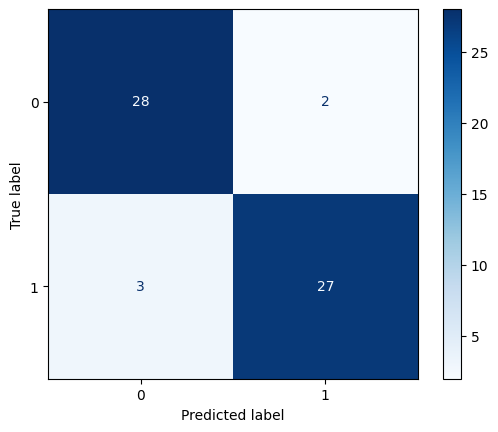

In [15]:
# -----------------------------------------------------------
# Матриця плутанини
# -----------------------------------------------------------

cm = confusion_matrix(T_test, T_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

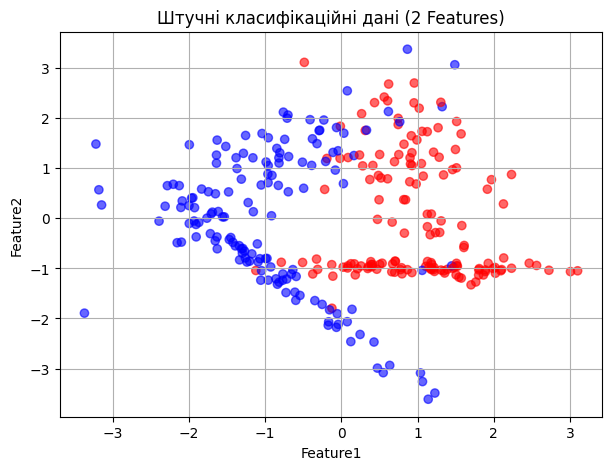

In [16]:
# -----------------------------------------------------------
# Візуалізація класифікації (аналог графіка з регресії)
# -----------------------------------------------------------

plt.figure(figsize=(7,5))
plt.scatter(synthetic_df['Feature1'], synthetic_df['Feature2'], c=synthetic_df['Target'], cmap="bwr", alpha=0.6)
plt.title("Штучні класифікаційні дані (2 Features)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.grid(True)
plt.show()